In [1]:
%matplotlib inline

# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Visualisation
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [2]:
wholedf = pd.read_csv('Weather_At_Barre_Montpelier_Knapp_State_Airport_VT_US_1948_-_2015.csv')

In [3]:
wholedf.tail()
wholedf['Date'] = pd.to_datetime(wholedf['Date'])
wholedf['month'] = wholedf['Date'].dt.month
wholedf['day'] = wholedf['Date'].dt.day
wholedf['year'] = wholedf['Date'].dt.year

In [4]:
wholedf['Mean Temp F'] = (wholedf['Min Temp F'] + wholedf['Max Temp F']) / 2
wholedf['Diff Temp F'] = wholedf['Max Temp F'] - wholedf['Min Temp F']
wholedf.tail()

,Date,Percipitation in.,Snow Depth in.,Snowfall in.,Max Temp F,Min Temp F,Ave Wind Spd mph,FOG,Sleet,Smoke/Haze,Thunder,month,day,year,Mean Temp F,Diff Temp F
24466,2015-06-16,0.41,0.0,0.0,71.06,53.96,7.16,True,False,False,False,6,16,2015,62.51,17.10
24467,2015-06-17,0.00,0.0,0.0,73.04,46.94,2.46,False,False,False,False,6,17,2015,59.99,26.10
24468,2015-06-18,0.17,0.0,0.0,75.92,48.92,5.37,True,False,False,False,6,18,2015,62.42,27.00
24469,2015-06-19,0.66,0.0,0.0,66.02,42.98,6.93,True,False,True,False,6,19,2015,54.50,23.04
24470,2015-06-20,0.13,0.0,0.0,75.02,39.92,8.05,True,False,False,False,6,20,2015,57.47,35.10


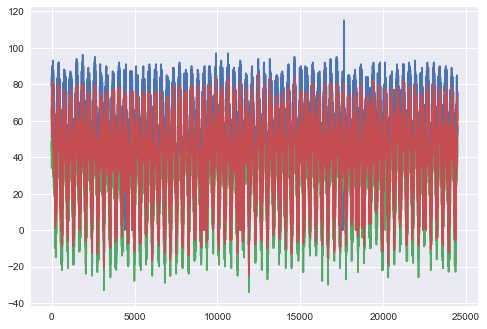

In [55]:
plt.plot(wholedf['Max Temp F'])
plt.plot(wholedf['Min Temp F'])
plt.plot(wholedf['Mean Temp F'])
plt.show()

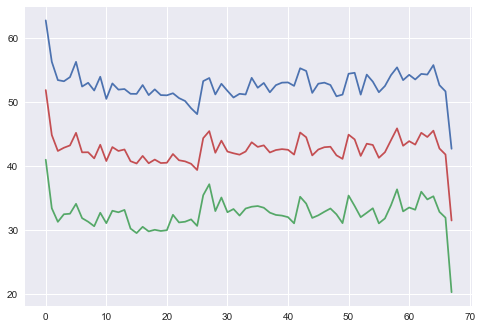

In [54]:
bymonth = wholedf[['month', 'Max Temp F','Min Temp F','Mean Temp F']].groupby(['month'], as_index=False).mean().sort_values(by='month',ascending=0)
byyear = wholedf[['year', 'Max Temp F','Min Temp F','Mean Temp F']].groupby(['year'], as_index=False).mean().sort_values(by='year',ascending=0)

plt.plot(byyear['Max Temp F'])
plt.plot(byyear['Min Temp F'])
plt.plot(byyear['Mean Temp F'])
plt.show()

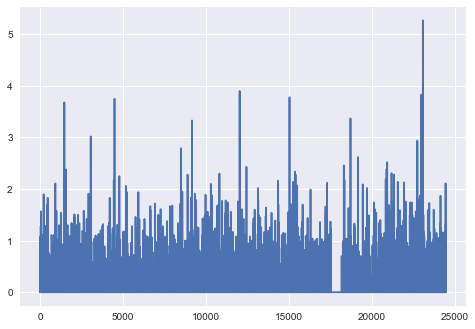

In [58]:
plt.plot(wholedf['Percipitation in.'])
#plt.plot(wholedf['Snow Depth in.'])
#plt.plot(wholedf['Snowfall in.'])
plt.show()

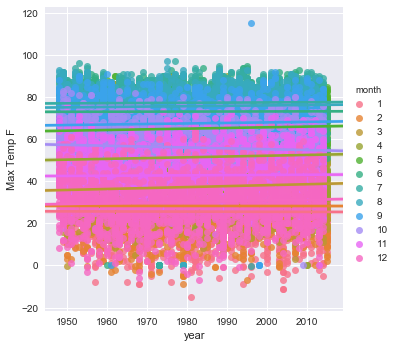

In [7]:
sns.lmplot(x='year', y='Max Temp F', hue='month', data=wholedf)
#plt.xlim(-40,)
#plt.ylim(-40,)

In [8]:
wholedf['month'] = wholedf['Date'].dt.month
wholedf['day'] = wholedf['Date'].dt.day
wholedf['year'] = wholedf['Date'].dt.year
wholedf.head()

,Date,Percipitation in.,Snow Depth in.,Snowfall in.,Max Temp F,Min Temp F,Ave Wind Spd mph,FOG,Sleet,Smoke/Haze,Thunder,month,day,year,Mean Temp F,Diff Temp F
0,1948-06-01,0.00,0.0,0.0,80.06,42.98,NaN,False,False,False,False,6,1,1948,61.52,37.08
1,1948-06-02,0.00,0.0,0.0,78.98,48.02,NaN,False,False,False,False,6,2,1948,63.50,30.96
2,1948-06-03,0.00,0.0,0.0,82.04,48.02,NaN,False,False,False,False,6,3,1948,65.03,34.02
3,1948-06-04,0.00,0.0,0.0,84.02,50.00,NaN,False,False,False,False,6,4,1948,67.01,34.02
4,1948-06-05,0.15,0.0,0.0,62.06,48.92,NaN,False,False,False,False,6,5,1948,55.49,13.14


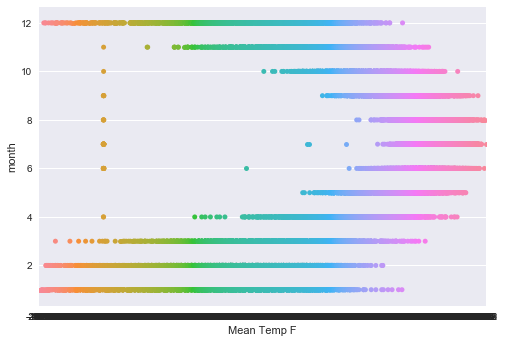

In [9]:
sns.swarmplot(x='Mean Temp F', y='month', data=wholedf)

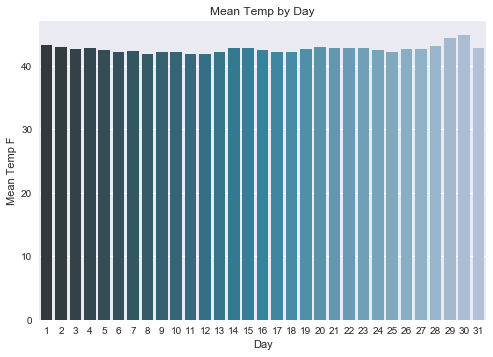

In [11]:
daydf = wholedf[['Mean Temp F']].groupby(wholedf['day'], as_index=False).mean()
daydf['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
daydf.columns = ['Count','Day']

sns.barplot(x='Day', y="Count", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Day")
plt.xlabel("Day")
plt.ylabel("Mean Temp F")
plt.show()

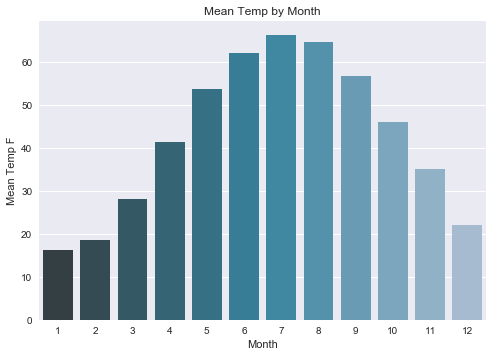

In [12]:
daydf = wholedf[['Mean Temp F']].groupby(wholedf['month'], as_index=False).mean()
daydf['Month'] = [1,2,3,4,5,6,7,8,9,10,11,12]
daydf.columns = ['Count','Month']

sns.barplot(x='Month', y="Count", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Month")
plt.xlabel("Month")
plt.ylabel("Mean Temp F")
plt.show()

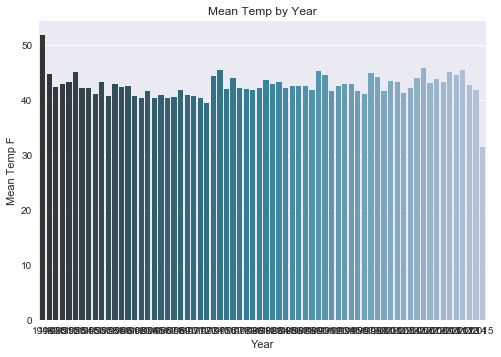

In [13]:
daydf = wholedf[['year','Mean Temp F']].groupby(wholedf['year'], as_index=False).mean()

sns.barplot(x='year', y="Mean Temp F", data=daydf, palette="PuBuGn_d")
plt.title("Mean Temp by Year")
plt.xlabel("Year")
plt.ylabel("Mean Temp F")
plt.show()

In [ ]:
daydf = wholedf[['year','Mean Temp F']].groupby(wholedf['year'], as_index=False).mean()
#daydf['Day'] = [1,2,3,4,5,6,7,8,9,10,11,12]
#daydf.columns = ['Count','Day']
daydf

In [ ]:
#sns.lmplot(x='', y='', data=wholedf)

In [27]:
from bokeh.plotting import figure, output_file, show

# prepare some data
x = wholedf['Max Temp F']
y = wholedf['Mean Temp F']

# output to static HTML file
output_file("bplot.html")

# create a new plot with a title and axis labels
p = figure(title="bokeh example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.circle(x, y)

# show the results
show(p)

INFO:bokeh.core.state:Session output file 'lines.html' already exists, will be overwritten.


In [36]:
from bokeh.plotting import figure, output_file, show

output_file("bplot.html")
            
p = figure(x_axis_type='datetime', plot_width=1000,title="bokeh example", x_axis_label='x', y_axis_label='y')

y1 = wholedf['Max Temp F']
y2 = wholedf['Min Temp F']
x = wholedf['Date']

p.circle(x, y1, color='green', fill_color='white', size=10, alpha=0.6)
p.circle(x, y2, color='red', fill_color='white', size=10, alpha=0.6)

show(p)

INFO:bokeh.core.state:Session output file 'bplot.html' already exists, will be overwritten.


In [40]:
from bokeh.plotting import figure, output_file, show

output_file("bplot.html")
            
p = figure(x_axis_type='datetime', plot_width=1000,title="bokeh example",
           x_axis_label='x', y_axis_label='y', tools='box_select, lasso_select')

y1 = wholedf['Max Temp F']
y2 = wholedf['Min Temp F']
x = wholedf['Date']

p.circle(x, y1, color='green', fill_color='white', size=10, alpha=0.6, 
         selection_color='green', nonselection_fill_color='grey', nonselection_fill_alpha=0.3)
p.circle(x, y2, color='blue', fill_color='white', size=10, alpha=0.6, 
         selection_color='blue', nonselection_fill_color='grey', nonselection_fill_alpha=0.3)

show(p)

INFO:bokeh.core.state:Session output file 'bplot.html' already exists, will be overwritten.


In [44]:
# import the HoverTool
from bokeh.models import HoverTool

y1 = wholedf['Max Temp F']
x = wholedf['Date']

# Create a HoverTool: hover
hover = HoverTool(tooltips=None, mode='vline')
          
p = figure(x_axis_type='datetime', plot_width=800,title="bokeh example",
           x_axis_label='x', y_axis_label='y')

p.circle(x, y1, color='green', fill_color='white', size=10, alpha=0.6, line_color=None,
         hover_fill_color='firebrick', hover_alpha=0.5, hover_line_color='white')

# Add the hover tool to the figure p
p.add_tools(hover)
        
show(p)

In [ ]:
from bokeh.models import CategoricalColorMapper 

# Make a CategoricalColorMapper object: color_mapper
    color_mapper = CategoricalColorMapper(factors=['Europe', 'Asia', 'US'],
                                      palette=['red', 'green', 'blue'])
# Add a circle glyph to the figure p
p.circle('weight', 'mpg', source=source,
            color=dict(field='origin', transform=color_mapper),
            legend='origin')

# Specify the name of the output file and show the result
output_file('colormap.html')
show(p)
